In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as ssp
%matplotlib notebook

In [104]:
Ne = 800
Ni = 200
Wee = np.zeros((Ne,Ne)) #ssp.lil_matrix(np.zeros((Ne,Ne)))
pconn = np.array((0.9,0.05,0.05))
rand_conn = np.random.rand(int(Ne*(Ne-1)/2))
is_connected = (rand_conn > pconn[0]).astype('int')
is_connected = is_connected + (rand_conn > (pconn[0]+pconn[1]))
counter = 0
for i in range(Ne):
    for j in range(i+1,Ne):
        if is_connected[counter]==2:
            Wee[i,j] = -np.log(np.random.rand(1))
            Wee[j,i] = -np.log(np.random.rand(1))
        elif is_connected[counter]==1:
            if np.random.rand(1)>0.5:
                Wee[i,j] = -np.log(np.random.rand(1))
            else:
                Wee[j,i] = -np.log(np.random.rand(1))
        counter = counter+1
# np.fill_diagonal(Wee,-1)

In [113]:
# Ni = Ne
# w,v = np.linalg.eig(Wee)
# Wdisynaptic = -v[:,:Ni] @ np.diag(w[:Ni]) @ np.linalg.inv(v)[:Ni,:]
u,s,v = np.linalg.svd(Wee)
Wdisynaptic = -u[:,:Ni] @ np.diag(s[:Ni]) @ v[:Ni,:]

<IPython.core.display.Javascript object>


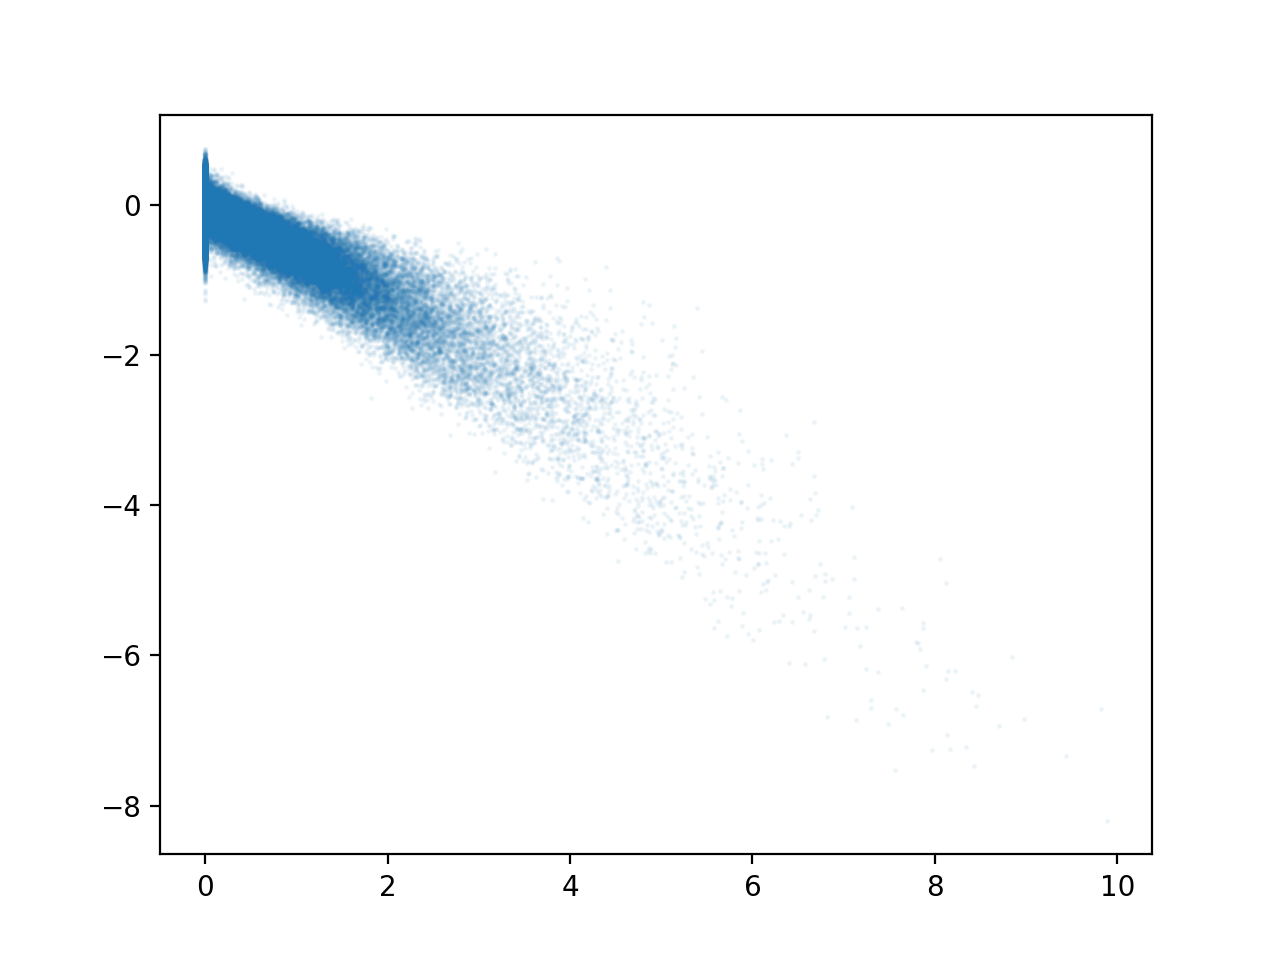

In [114]:
plt.scatter(Wee.flatten(),Wdisynaptic.flatten(),s=1,alpha=0.05)